# Pandemic Simulation with Object-Oriented Programming

In this project, with only very basic Python libraries like math, random, matplotlib, I will try to create a simple Simulation of how a Pandemic Spread, with some specified rules that are closely resembled those in reality. At the end, I visualize the results obtained from the simulation, based on different input scenarios, to highlight some key insights regarding social distancing and patient zero health. This project heavily makes use of Object Oriented Programming to create the classes needed to run the simulation.

## Introduction and Backgrounds

Viral Epidemics like the 1918 influenza pandemic, or more recently Covid19 pandemic, got out of hand. I would like to simulate the way such diseases spread, in order to better understand how this happens. 

In this project, there are 3 main tasks. Firstly, I will create the necessary data structure (classes) to simulate social links from the data file "Network data.txt" and disease transmission between people. Then, I will simulate infections among the population over a period of time. Lastly, I plot graphs to determine whether an outbreak is contained or not, based on different input scenarios.

The data file used for this project is "Network data.txt", which contains 200 unique records. Each record is on its own line in the file, consisting of a person's name, together with the names of that person's friends, whom they are in regular contact with. Each person has at least 1 friend, and each of the person's friends has also named that person as a friend.


Rules for how the virus spreads:
    - Each person has a number of health points that changes over time depending on a person's health. The number of health points is used to check if a patient is contagious or not:
        - 50-100: Not contagious
        - 30-49: Contagious
        - 0-29: Poor health, contagious
    - After each day, due to sleeping well, each person's immune system will naturally add 5 health points, up to a maximum possible health of 100. The minimum possible health is 0.
    - A person's current health should be rounded to the nearest integer.
    - Each day, a person may or may not visit their friend. A meeting probability parameter will be applied to all people depends on social distancing regulations.
    - The virus spreads when a contagious person passes a viral load to a person they are visiting, or a person who has visited them. A person can be affected by a viral load even if they are already partly sick. The viral load follows this formula:
$$ViralLoad=5+\frac{(HealthPoint-25)^2}{62}$$
    - When a contagious person produces a viral load, every person they meet when visiting (or being visited) will be affected by their viral load. Formula for effect of infection is as followed, where HPa is the new value of a person's health points after receiving the viral load, and HPb is the current health points before receiving the viral load:
$$
    HP_a= 
\begin{cases}
    HP_b-(0.1*ViralLoad),& \text{if } HP_b\leq 29\\
    HP_b-(1.0*ViralLoad),& \text{if } 29 \leq HP_b < 50 \\
    HP_b-(2.0*ViralLoad),& \text{if } 50\leq HP_b
\end{cases}
$$
          

## Table of Content

1. [Representing Social Connections](#1)
2. [Simulate Disease Spread](#2)
3. [Plot graph to visualize the simulation](#3)

### 1. Representing Social Connections <a class="anchor" id="1"></a>

In this section, we represent social connections through Person object. 

In [26]:
#Define a class named Person to represent the records
class Person:

    #constructor method to create a new Person object
    def __init__(self, first_name, last_name):
        self.first_name=first_name
        self.last_name=last_name
        self.friendlist = []

    #add a new social connection to be stored in this Person object
    def add_friend(self, friend_person):
        self.friendlist.append(friend_person)       #friend_person is a reference to another Person object

    #return a string containing the person's first and last name concatenated together
    def get_name(self):
        self.get_name=self.first_name +' '+ self.last_name
        return self.get_name

    #return a list of Person objects for the social connection that have been added
    def get_friends(self):
        return self.friendlist

### 2. Simulate Disease Spread <a class="anchor" id="2"></a>

In this section, based on prior specifications of how a disease spreads, we create Patient class to simulate the disease spread

In [27]:
import math, random

In [28]:
#Create Patient class which inherits from Person class earlier
class Patient(Person):
    #Inherit from Person class created earlier
    def __init__(self,first_name,last_name,initial_health):
        super().__init__(first_name,last_name)
        self.initial_health=initial_health
        self.current_health=self.initial_health
        self.friendlist=[]
        
    #Get name of the Patient
    def get_name(self):
        self.get_name=super(Patient,self).get_name()
        return self.get_name
    
    #Add friend method
    def add_friend(self,friend_patient):
        super(Patient,self).add_friend(friend_patient)
        
    #Get the friend list    
    def get_friends(self):
        return super(Patient,self).get_friends()
    
    #Get the health points, which must be rounded to nearest integer
    def get_health(self):
        if self.current_health - int(self.current_health)<0.5:
            self.current_health=math.floor(self.current_health)
            return self.current_health
        else:
            self.current_health=math.ceil(self.current_health)
            return self.current_health
    
    #Set to new health
    def set_health(self,new_health):
        self.current_health=new_health
    
    #A method to check if a Patient is contagious
    def is_contagious(self):
        if self.current_health<=49 and self.current_health>=0:
            return True
        elif self.current_health>=50 and self.current_health<=100:
            return False
        
    #A method to define the infection process    
    def infect(self,viral_load):
        if self.current_health<=29:
            if self.current_health-(0.1*viral_load)>0:
                self.current_health-=(0.1*viral_load)
            else:
                self.current_health=0 #a Patient health cannot go below 0
        elif self.current_health >29 and self.current_health<50:
            if self.current_health-(1.0 *viral_load)>0:
                self.current_health-=(1.0*viral_load)
            else:
                self.current_health=0
        elif self.current_health>=50:
            if self.current_health-(2.0*viral_load)>0:
                self.current_health-=(2.0*viral_load)
            else:
                self.current_health=0
    
    #Sleep method to add to health points
    def sleep(self):
        if self.current_health + 5 <100:
            self.current_health+=5
            
        else:
            self.current_health=100 #a Patient health cannot go above 100

In [29]:
#Create load_patients function
def load_patients(data,default_health):
    read_data = open(data, "r")
    all_patient_object_list = []            #list of all Patient object that have been created from the file records
    all_patient_name_list = []              #name list of all the above Patient objects
    for aline in read_data:
        for char in aline:
            if char == ':' or char == ",":
                aline = aline.replace(char, '')
        edited_line = aline.split()


        #The patient object has not been created
        if Patient(edited_line[0], edited_line[1], default_health).get_name() not in all_patient_name_list:
            a_patient = Patient(edited_line[0], edited_line[1], default_health)
            all_patient_object_list.append(a_patient)
            all_patient_name_list.append(a_patient.get_name())

            # From third element until the end of a line is the names of the friends of that particular patient of interest
            patient_friendlist = edited_line[2:]
            while patient_friendlist != []:

                # A sub-case of the friend patient object has not been created
                if Patient(patient_friendlist[0], patient_friendlist[1],
                           default_health).get_name() not in all_patient_name_list:
                    a_patient_friend = Patient(patient_friendlist[0], patient_friendlist[1], default_health)
                    a_patient.add_friend(a_patient_friend)
                    all_patient_object_list.append(a_patient_friend)
                    all_patient_name_list.append(a_patient_friend.get_name())

                # The other sub-case where the friend patient object has already been created elsewhere
                else:
                    for friend_patient in all_patient_object_list:
                        if Patient.get_name(friend_patient) == Patient(patient_friendlist[0], patient_friendlist[1],
                                                                       default_health).get_name():
                            existed_friend_patient = friend_patient
                            a_patient.add_friend(existed_friend_patient)
                del patient_friendlist[0:2]

        # The patient object has been created elsewhere
        else:
            existed_patient_friendlist = edited_line[2:]
            while existed_patient_friendlist != []:

                # A sub-case of the friend patient object has not been created
                if Patient(existed_patient_friendlist[0], existed_patient_friendlist[1],
                           default_health).get_name() not in all_patient_name_list:
                    a_patient_friend = Patient(existed_patient_friendlist[0], existed_patient_friendlist[1],
                                               default_health)
                    for particular_patient in all_patient_object_list:
                        if Patient.get_name(particular_patient) == Patient(edited_line[0], edited_line[1],
                                                                           default_health).get_name():
                            existed_patient = particular_patient
                            existed_patient.add_friend(a_patient_friend)
                    all_patient_object_list.append(a_patient_friend)
                    all_patient_name_list.append(a_patient_friend.get_name())

                # The other sub-case where the friend patient object has already been created elsewhere
                else:
                    for friend_patient in all_patient_object_list:
                        if Patient.get_name(friend_patient) == Patient(existed_patient_friendlist[0],
                                                                       existed_patient_friendlist[1],
                                                                       default_health).get_name():
                            existed_friend_patient = friend_patient
                            for particular_patient in all_patient_object_list:
                                if Patient.get_name(particular_patient) == Patient(edited_line[0], edited_line[1],
                                                                                   default_health).get_name():
                                    existed_patient = particular_patient
                                    existed_patient.add_friend(existed_friend_patient)
                del existed_patient_friendlist[0:2]

    read_data.close()
    return all_patient_object_list

In [30]:
#Create run_simulation function
def run_simulation(data, days, meeting_probability, patient_zero_health):
    all_patient_object_list = load_patients(data, 75)
    all_patient_object_list[0].set_health(patient_zero_health)      #set health of patient zero
    contagious_patient_list = []
    contagious_name_list = []
    daily_contagious_no_list = []       #The list with daily number of contagious cases through the duration of the simulation
    while days > 0:
        for patient in all_patient_object_list:
            random_outcome = random.random()  #Randomize the meeting probability among friends
            if random_outcome <= meeting_probability:   #If the patient visit his friends

                #In the case the visit occurs, there are 2 big cases, with 2 sub cases for each.
                #The first case is where the patient who visits his friend is contagious, with 2 sub cases of the visited friend
                #becomes contagious upon receiving the viral load from the contagious patient, or the visited friend
                #is still not contagious upon receiving the viral load from the contagious patient.

                #The second case is where the patient who visits his friend is not contagious, with 2 sub cases of
                #the visited friend happens to be contagious and pass a viral load to the non contagious patient,
                #or the visited friend is not contagious

                #The case where the visting patient is contagious
                if patient.is_contagious():

                    #if the contagious patient is not yet in the contagious list, add him
                    if Patient.get_name(patient) not in contagious_name_list:
                        contagious_patient_list.append(patient)
                        contagious_name_list.append(Patient.get_name(patient))

                    #Since the patient is contagious, the patient will produce the viral load according to the given formula
                    Lv = 5 + (((patient.get_health() - 25) ** 2) / 62)

                    for patient_friend in patient.get_friends():
                        patient_friend.infect(Lv)       #infect his friends with the viral load

                        #the sub case where after receiving the viral load, the friend is contagious. 
                        #Then if the contagious friend is not contagious list, add him
                        if patient_friend.is_contagious():

                            if Patient.get_name(patient_friend) not in contagious_name_list:
                                contagious_patient_list.append(patient_friend)
                                contagious_name_list.append(Patient.get_name(patient_friend))

                            friend_lv=5 + (((patient_friend.get_health() - 25) ** 2) / 62)      
                            #since the patient friend is contagious now, the friend also produces a viral load and 
                            #spreads it to the patient
                            
                            patient.infect(friend_lv)

                        #the sub case where after receiving the viral load, the friend is still not contagious.
                        #Then if he is in contagious list, remove him
                        elif not patient_friend.is_contagious():
                            if Patient.get_name(patient_friend) in contagious_name_list:
                                contagious_patient_list.remove(patient_friend)
                                contagious_name_list.remove(Patient.get_name(patient_friend))

                #the case where the patient visiting his friends is not contagious, 
                #so no viral load is produced from the non contagious patient
                elif not patient.is_contagious():

                    for patient_friend in patient.get_friends():

                        #the sub case where the visited friend is contagious and pass a viral load to the 
                        #non contagious patient
                        if patient_friend.is_contagious():
                            if Patient.get_name(patient_friend) not in contagious_name_list:
                                contagious_patient_list.append(patient_friend)
                                contagious_name_list.append(Patient.get_name(patient_friend))

                            friend_lv=5 + (((patient_friend.get_health() - 25) ** 2) / 62)
                            
                            #the visited friend pass the viral load to the non contagious patient
                            patient.infect(friend_lv)       
                           

                            #check if after receiving the viral load from the visited friend, the non contagious patient 
                            #becomes contagious or not. If he does, add him to contagious list if he is not already in and 
                            #he now produces a viral load and spreads to the friend.If he does not, 
                            #remove him from contagious list if he is already in.
                            if patient.is_contagious():
                                if Patient.get_name(patient) not in contagious_name_list:
                                    contagious_patient_list.append(patient)
                                    contagious_name_list.append(Patient.get_name(patient))
                                patient_lv=5 + (((patient.get_health() - 25) ** 2) / 62)
                                patient_friend.infect(patient_lv)

                            elif not patient.is_contagious():
                                if Patient.get_name(patient) in contagious_name_list:
                                    contagious_patient_list.remove(patient)
                                    contagious_name_list.remove(Patient.get_name(patient))

                        #the sub case where the visited friend is not contagious
                        elif not patient_friend.is_contagious():

                            #since both patient and the visited friend is not contagious, 
                            #remove them from contagious list if they are in
                            if Patient.get_name(patient) in contagious_name_list:
                                contagious_patient_list.remove(patient)
                                contagious_name_list.remove(Patient.get_name(patient))

                            if Patient.get_name(patient_friend) in contagious_name_list:
                                contagious_patient_list.remove(patient_friend)
                                contagious_name_list.remove(Patient.get_name(patient_friend))

            else:       #if the patient does not visit his friend

                #if the patient is contagious and he is not yet in contagious list, add him
                if patient.is_contagious():
                    if Patient.get_name(patient) not in contagious_name_list:
                        contagious_patient_list.append(patient)
                        contagious_name_list.append(Patient.get_name(patient))

                #if the patient is not contagious and he is in the contagious list, remove him
                elif not patient.is_contagious():
                    if Patient.get_name(patient) in contagious_name_list:
                        contagious_patient_list.remove(patient)
                        contagious_name_list.remove(Patient.get_name(patient))

        #let the patient sleep to recover some health at the end of the day
        for patient in all_patient_object_list:
            patient.sleep()
        #print(contagious_name_list)         #check to see the name of contagious patient for that day
        #print(len(contagious_patient_list))     #check to see the number of contagious patient that day
        daily_contagious_no_list.append(len(contagious_patient_list))
        days -= 1

    #return the list with daily number of contagious cases through the duration of the simulation    
    return (daily_contagious_no_list)       

Try out some test cases, to see how the epidemic spreads in different situations.

In [31]:
#15 days of spread, probability of 0.8 that friends will meet, patient zero health is 49
testcase_1=run_simulation('Network data.txt',15,0.8,49)
print(testcase_1)

[16, 40, 75, 112, 139, 159, 175, 190, 195, 197, 197, 199, 200, 200, 200]


Due to high meeting probability, social distancing measures are limted, the epidemic spreads quickly. After 15 days, the whole community of 200 people are infected.

In [32]:
#40 days of spread, friends will surely meet, patient zero health is 1
testcase_2=run_simulation('Network data.txt',40,1,1)
print(testcase_2)

[17, 69, 129, 174, 187, 199, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]


There are no social distancing measures in placed, so the virus spreads quickly, infected the whole community of 200 people in only about 6 days.

### 3. Plot graph to visualize the simulation <a class="anchor" id="3"></a>

In this section, we plot some graphs to better visualize the simulation and extract some key insights

In [33]:
from matplotlib import pyplot as plt
def visual_curve(data,days,meeting_probability,patient_zero_health):
    daily_contagious_no_list=run_simulation(data,days,meeting_probability,patient_zero_health)
    x=list(range(days))
    plt.plot(x,daily_contagious_no_list)
    plt.xlabel('Days')
    plt.ylabel('Count')
    plt.title('Simulation Curve')
    plt.show()

**Scenario A (An uncontained outbreak)**: There are many social gatherings, and ‘patient zero’ is quite unwell at the beginning of
the simulation. The situation might get out of control very quickly. 

Number of days: 30

Meeting probability: 0.6

Patient zero health: 25 health points

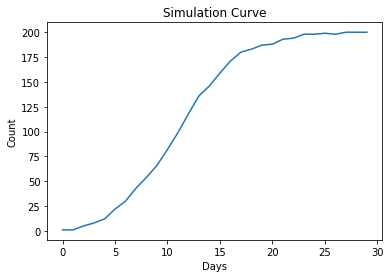

In [34]:
days_A=30
prob_A=0.6
health_A=25
visual_curve('Network data.txt',days_A,prob_A,health_A)

**Scenario B (An unpredictable situation)**: There are minimal social distancing restrictions implemented (to discourage people from meeting), and ‘patient zero’ only has very mild symptoms but is maximally contagious. In this scenario the situation
could be very unpredictable and depend on pure luck. we might get different results each time the
simulation runs based on random probability. Sometimes patient zero may not spread the disease at all before
recovering and there is no outbreak. In unlucky cases, the virus may begin to spread. 

Number of days: 60

Meeting probability: 0.25

Patient zero health: 49 health points

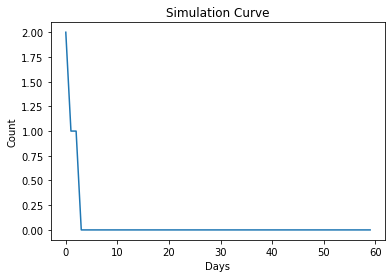

In [35]:
#Lucky case
days_B=60
prob_B=0.25
health_B=49
visual_curve('Network data.txt',days_B,prob_B,health_B)

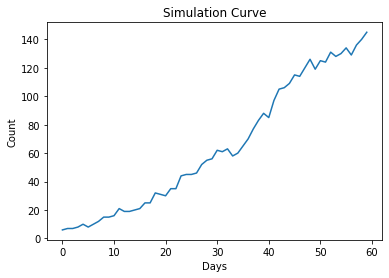

In [36]:
#Unlucky case
days_B=60
prob_B=0.25
health_B=49
visual_curve('Network data.txt',days_B,prob_B,health_B)

**Scenario B (Flattening the curve)**: Social distancing restrictions on meetings could mean that while there is the chance for
an outbreak, it is more likely that the disease will die out quickly, case numbers will flatten out, or only grow slowly.

Number of days: 90

Meeting probability: 0.18

Patient zero health: 40 health points

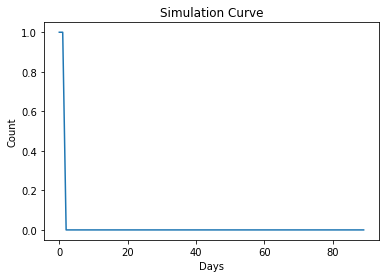

In [37]:
days_C=90
prob_C=0.18
health_C=40
visual_curve('Network data.txt',days_C,prob_C,health_C)